<a href="https://colab.research.google.com/github/supriyatskumar/ML-Algorithms-from-Scratch/blob/main/hmm_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HMM Tutorial
## WIDS Workshops June 29, 2022
### Julia Costacurta, Stanford University

First, some package loading and helper functions for working with torch probability distributions.

In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from torch.distributions import Categorical
import torch

device = torch.device('cpu')
dtype = torch.float64
# Helper function to convert between numpy arrays and tensors
to_t = lambda array: torch.tensor(array, device=device, dtype=dtype)
from_t = lambda tensor: tensor.to("cpu").detach().numpy()

# Coding a Categorical Hidden Markov Model

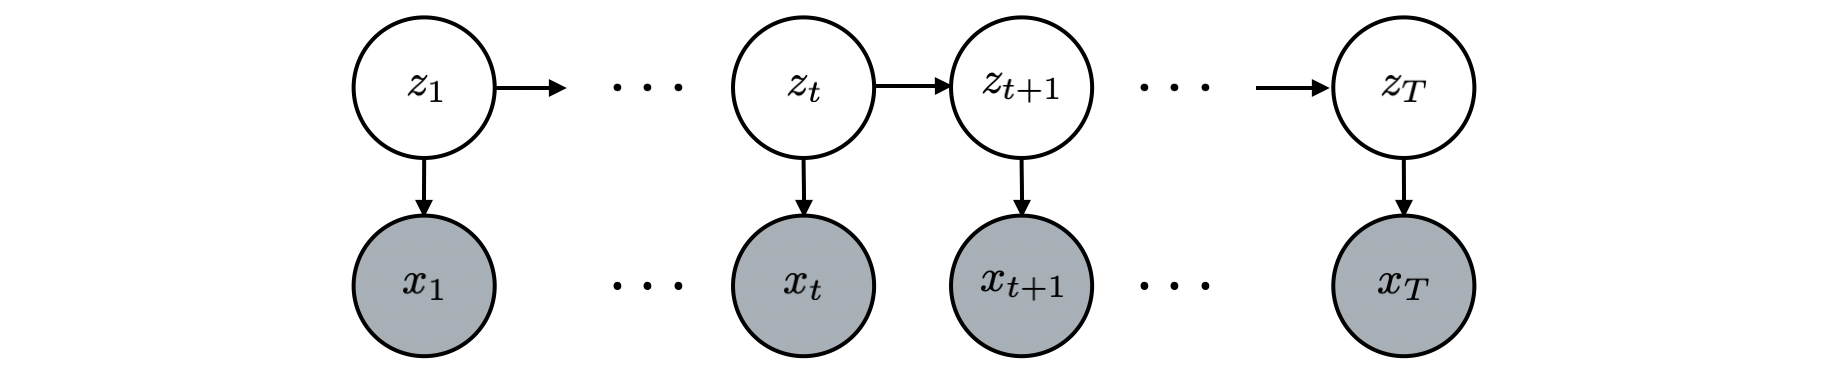

Recall the graphical model of an HMM, which is shown above. In the categorical case (like our Alice + Beth example), we can represent the transition probabilities for the discrete states $z_t$ and observation probabilities for the observed states $x_t$ in matrix form.


In [ ]:
class HMM_categorical():
  def __init__(self, num_states, num_obs, transition_probs, observation_probs, initial_state_dist):
    # store these values in the class
    self.num_obs = num_obs # number of possible observations
    self.num_states = num_states # number of states

    self.transition_matrix = transition_probs # hidden state transition probabilities, [1,0] entry is p(z_t+1 = 0 | z_t = 1) 
    self.initial_dist = initial_state_dist # probabilities for initial hidden state

    self.observation_matrix = observation_probs # observation probabilities, [1,0] entry is p(x_t = 0 | z_t = 1) 

  def sample(self, T=10):
    sample_states = np.zeros(T)
    sample_obs = np.zeros(T)

    # sample the hidden state and observation at time 0
    

    # loop over the rest of the time steps
    for t in range(T-1):
      ...
    
    return sample_states, sample_obs

Working solution below 

In [ ]:
#@title
class HMM_categorical():
  def __init__(self, num_states, num_obs, transition_probs, observation_probs, initial_state_dist):
    # store these values in the class
    self.num_obs = num_obs # number of possible observations
    self.num_states = num_states # number of states

    self.transition_matrix = transition_probs # hidden state transition probabilities, [1,0] entry is p(z_t+1 = 0 | z_t = 1) 
    self.initial_dist = initial_state_dist # probabilities for initial hidden state

    self.observation_matrix = observation_probs # observation probabilities, [1,0] entry is p(x_t = 0 | z_t = 1) 

  def sample(self, T=10):
    sample_states = np.zeros(T)
    sample_obs = np.zeros(T)

    # sample the hidden state and observation at time 0
    initial_state = Categorical(to_t(self.initial_dist)).sample()
    initial_obs = Categorical(to_t(self.observation_matrix[int(initial_state)])).sample()

    sample_states[0] = initial_state
    sample_obs[0] = initial_obs

    # loop over the rest of the time steps
    for t in range(T-1):
      current_state = sample_states[t]
      # sample new hidden state and observation
      new_state = Categorical(to_t(self.transition_matrix[int(current_state)])).sample()
      new_obs = Categorical(to_t(self.observation_matrix[int(new_state)])).sample()

      sample_states[t+1] = new_state
      sample_obs[t+1] = new_obs
    
    return sample_states, sample_obs

Let's define an HMM and test out our sampling function!

In [ ]:
num_states = 2
num_obs = 3

transition_probs = np.array([[0.8, 0.2],[0.4, 0.6]])
observation_probs = np.array([[0.1, 0.1, 0.8],[0.5, 0.4, 0.1]])
initial_dist = np.array([[0.9, 0.1]])

hmm = HMM_categorical(num_states, num_obs, transition_probs, observation_probs, initial_dist)

In [ ]:
states_sample, obs_sample = hmm.sample(10)

We can then plot the sampled hidden states and observations.

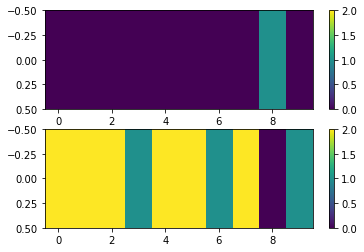

In [ ]:
fig, ax = plt.subplots(2,1)

state_plot = ax[0].imshow(states_sample[None,:1000],  aspect="auto", vmin=0, vmax=2)
fig.colorbar(state_plot,ax=ax[0])
obs_plot = ax[1].imshow(obs_sample[None,:1000],  aspect="auto", vmin=0, vmax=2)
fig.colorbar(obs_plot)

Now, let's move on to coding the forward algorithm, also called a forward pass.

\begin{align*}
\alpha\left(z_t\right) =p\left(x_t \mid z_t\right)\sum_{z_{t-1}}p\left(z_t\mid z_{t-1}\right)\alpha\left(z_{t-1}\right) 
\end{align*}
\begin{align*}
\alpha\left(z_1\right) =p\left(x_1\mid z_{1}\right)p\left(z_{1}\right)
\end{align*}

In [ ]:
def forward_pass(self, obs):
  alphas = np.zeros((self.num_states, len(obs)))

  # calculate initial alphas
  for s in range(self.num_states):
    ...
  # compute rest of alphas using recursion
  for t in np.arange(1, len(obs)):
    for s in range(self.num_states):
      ...
  return alphas

HMM_categorical.forward_pass = forward_pass

Working solution below

In [ ]:
#@title
def forward_pass(self, obs):
  alphas = np.zeros((self.num_states, len(obs)))

  for s in range(self.num_states):
    alphas[s, 0] = self.initial_dist[:,s] * self.observation_matrix[s, int(obs[0])]
  for t in np.arange(1, len(obs)):
    for s in range(self.num_states):
      alphas[s, t] = self.observation_matrix[s, int(obs[t])] * np.sum(alphas[:, t-1] * self.transition_matrix[:, s])

  return alphas

HMM_categorical.forward_pass = forward_pass

Then, let's test our forward pass! Do these numbers make sense?

In [ ]:
hmm.forward_pass(np.array([2., 1., 2., 2., 0.]))

array([[0.72      , 0.058     , 0.05632   , 0.037568  , 0.00306192],
       [0.01      , 0.06      , 0.00476   , 0.001412  , 0.0041804 ]])

\begin{align*}
T = \begin{bmatrix}
0.8 & 0.2\\
0.4 & 0.6 
\end{bmatrix}, \ 
O = \begin{bmatrix}
0.1 & 0.1 & 0.8\\
0.5 & 0.4 & 0.1
\end{bmatrix}
\end{align*}
